In [55]:
import cv2
from skimage.feature import local_binary_pattern
import numpy as np
import os
import matplotlib.pyplot as plt

def compute_lbp(image, radius=1, n_points=8):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute LBP
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    
    return lbp

def visualize_lbp(image, lbp, hist):
    # Plot original image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot LBP image
    plt.subplot(1, 3, 2)
    plt.imshow(lbp, cmap='gray')
    plt.title('LBP Image')
    plt.axis('off')

    # Plot LBP image
    plt.subplot(1, 3, 3)
    plt.bar(np.arange(0, 9), hist, color='b', alpha=0.7)
    plt.xlabel('LBP Bin')
    #plt.ylabel('Frequency')
    plt.ylabel('')
    plt.title('LBP Histogram')
    plt.xticks(np.arange(0, 9))
    # reduce y tick size
    plt.tick_params(axis='y', which='major', labelsize=6)
    # make square
    plt.gca().set_aspect(31, adjustable='box')
    plt.show()

def compute_histogram(lbp_image):
    # Compute histogram
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 10), range=(0, 9))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalize
    
    return hist

def visualize_histogram(hist):
    plt.bar(np.arange(0, 9), hist, color='b', alpha=0.7)
    plt.xlabel('LBP Bin')
    plt.ylabel('Frequency')
    plt.ylabel('')
    plt.title('LBP Histogram')
    plt.xticks(np.arange(0, 9))
    plt.show()

def process_images_in_folder(folder_path):
    all_histograms = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            
            # Compute LBP
            lbp = compute_lbp(image)

            # Compute histogram
            hist = compute_histogram(lbp)

            # Visualizing images
            visualize_lbp(image, lbp, hist)

            # Append histogram to list
            all_histograms.append(hist)
    # Visualize combined histogram
    print('average histogram')
    combined_hist = np.mean(all_histograms, axis=0)
    visualize_histogram(combined_hist)

## Blurred Images

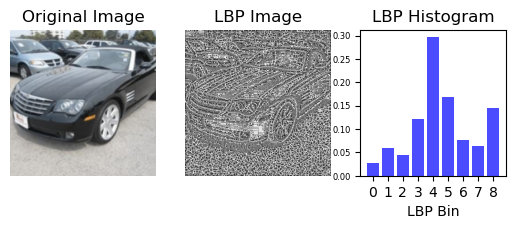

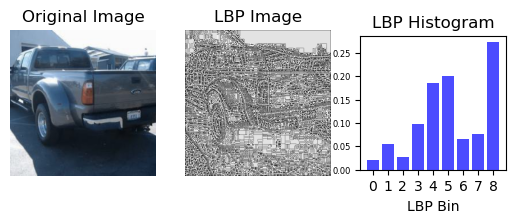

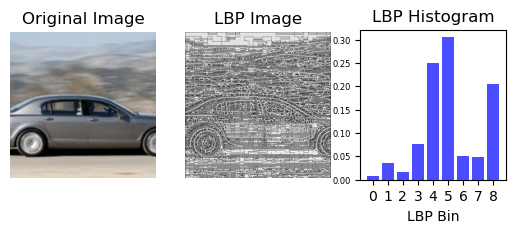

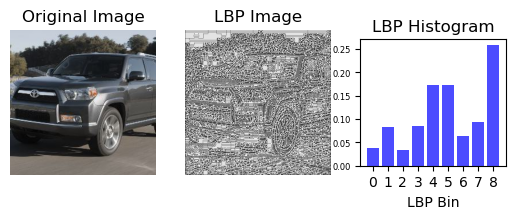

average histogram


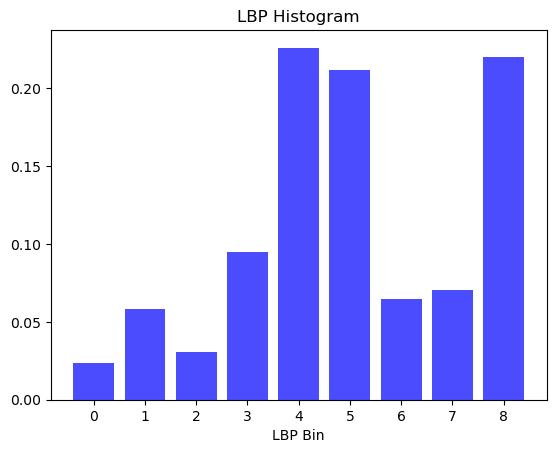

In [56]:
# Path to the folder containing images
folder_path = '../../../Images/single class samples/Blur'

# Process images in the folder
process_images_in_folder(folder_path)

## Non-Blurred Images


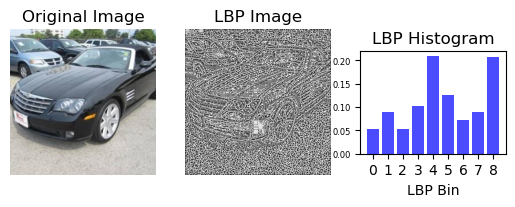

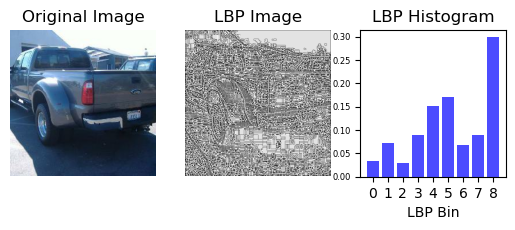

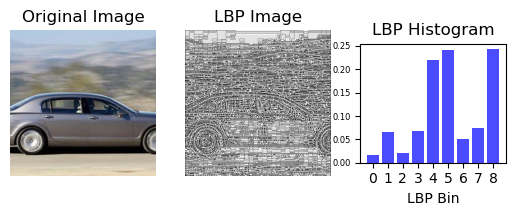

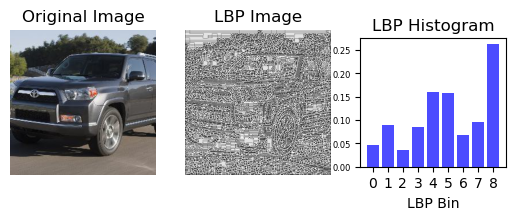

average histogram


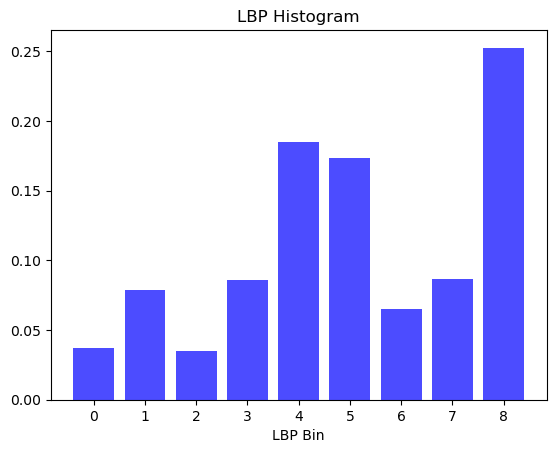

In [57]:
# Path to the folder containing images
folder_path = '../../../Images/single class samples/No Blur'

# Process images in the folder
process_images_in_folder(folder_path)